Having successfully scraped the verse lengths of each of the sections of the Doctrine and Covenants, I knew that I was pretty close to being able to scrape the verse lengths of each of the chapters of each of the books of each of the other Volumes of Scripture - The Old Testament, The New Testament, The Book of Mormon, and The Pearl of Great Price. 

I decided to start here with the Book of Mormon since that is the book we are currently studying this year, so working through python and possibly SQL to develop a breakdown of that will prepare me to develop a breakdown for the Doctrine and Covenants this coming year. 

I'll start the process by importing all the same necessary packages as I imported previously. 

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import re
import glob

In [2]:
os.getcwd()

'd:\\Faith and Religion Stuff\\Come, Follow Me\\come-follow-me-breakdown-builder'

After importing the necessary packages and making sure my working directory was set properly, I needed to get and save the link I wanted to start with - in this case, the landing page for the Book of Mormon on the Church's website. 

In [14]:
url = 'https://www.churchofjesuschrist.org/study/scriptures/bofm?lang=eng'

In [15]:
response = requests.get(url)
response

<Response [200]>

In [16]:
response.content

b'<!DOCTYPE html>\n        <html lang="en">\n            <head>\n                <meta charset="utf-8">\n                <title data-react-helmet="true">Book of Mormon</title>\n                <meta name="version" content="4.23.0">\n                <meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1">\n                <meta data-react-helmet="true" name="Search.doc-aid" content/><meta data-react-helmet="true" name="title" content="Book of Mormon"/><meta data-react-helmet="true" name="description" content="Single source files for generating the English print scriptures. The basic text of the Translator\xe2\x80\x99s Copy of the scriptures (06897) can also be derived from these files."/><meta data-react-helmet="true" property="og:title" content="Book of Mormon"/><meta data-react-helmet="true" property="og:type" content="website"/><meta data-react-helmet="true" property="og:url" content="https://www.churchofjesuschrist.org/study/eng/scriptures/bofm/_manifest

In [17]:
response.headers

{'Content-Security-Policy': "frame-src 'self' https://*.churchofjesuschrist.org/ https://*.veniracristo.org/ https://*.vindeacristo.org/ https://*.trustarc.com/;style-src 'self' 'unsafe-inline' *", 'Content-Type': 'text/html', 'ETag': 'W/"15bde-f065ZMAlJErHN4huA9JyO3pSqrE"', 'X-Response-Time': '1079.034ms', 'X-Vcap-Request-Id': '9cd5c05d-167b-45f2-499a-be87f170ce13', 'X-Akamai-Transformed': '9 - 0 pmb=mRUM,1', 'Content-Encoding': 'gzip', 'Cache-Control': 'max-age=3600', 'Date': 'Sun, 10 Nov 2024 04:36:25 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive, Transfer-Encoding', 'Vary': 'Accept-Encoding', 'Server-Timing': 'cdn-cache; desc=HIT, edge; dur=1, ak_p; desc="1731213385608_399222596_248001082_18_5149_254_32_-";dur=1'}

In [18]:
print(response.headers['Content-Type'])

text/html


In [19]:
soup = BeautifulSoup(response.content, "html.parser")

In [20]:
type(soup)

bs4.BeautifulSoup

In [21]:
content = soup.prettify()  # This formats the HTML in a readable way
print(content)

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title data-react-helmet="true">
   Book of Mormon
  </title>
  <meta content="4.23.0" name="version"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1" name="viewport"/>
  <meta content="" data-react-helmet="true" name="Search.doc-aid">
   <meta content="Book of Mormon" data-react-helmet="true" name="title">
    <meta content="Single source files for generating the English print scriptures. The basic text of the Translator’s Copy of the scriptures (06897) can also be derived from these files." data-react-helmet="true" name="description">
     <meta content="Book of Mormon" data-react-helmet="true" property="og:title"/>
     <meta content="website" data-react-helmet="true" property="og:type"/>
     <meta content="https://www.churchofjesuschrist.org/study/eng/scriptures/bofm/_manifest" data-react-helmet="true" property="og:url"/>
     <link href="https://ips-cdn-edge.churchofjesuschrist.org" rel="

Upon inspecting the HTML content, I found that **class="sc-12mz36o-0 jSCFto sc-omeqik-9 dbmmCn"** is the attribute class tag I'll be looking for to get the links for each of the chapters of the Book of Mormon. 

In [22]:
# Define the path to the chromedriver executable
chrome_driver_dir = r'D:\Faith and Religion Stuff\Come, Follow Me\chromedriver-win64'
chrome_driver_path = os.path.join(chrome_driver_dir, 'chromedriver.exe')

 # Set up the headless browser options
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920x1080")

# Set up the Chrome service
service = Service(chrome_driver_path)    
    
# Initialize the Chrome WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)

# Establish a try loop. 
try:
    # Navigate to the page with your elements
    driver.get(url)

    # Find all elements with the specified class name
    # Gotta use dots, not spaces, here because CSS considers each of those spaces to be defining a dif class object
    elements = driver.find_elements(By.CSS_SELECTOR, 'h4.sc-12mz36o-0.jSCFto.sc-omeqik-9.dbmmCn')  

    # Initialize a list to store href values
    href_list = []
    title_list = []

    # Iterate over each element and extract the href attribute
    for element in elements:
        # Since the element I want to get the links for is not the one with the links, I need to find the right one, then "go back" to get the attribute associated with each h4 . 
        parent_a_tag = element.find_element(By.XPATH,'..//ancestor::a')
        # Once it find the right classes and goes back to get the attribute, it can get the link associated with that attribute. 
        href = parent_a_tag.get_attribute('href')
        # appends the link to a list
        href_list.append(href)

    # find the <p> tag that has the title for each <a> tag
        title_element = parent_a_tag.find_element(By.CSS_SELECTOR, 'p.title')
        title = title_element.text
        title_list.append(title)
        
    # Create a DataFrame to store the href values
    urls_df = pd.DataFrame({'Title':title_list,'Href': href_list})

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the browser
    driver.quit()

Unfortunately this pulled the links for the Pronunciation Guide and the Reference Guide, so I just needed to remove those real quick. 

In [23]:
urls_df = urls_df[0:245]
urls_df

,Title,Href
0,Title Page of the Book of Mormon,https://www.churchofjesuschrist.org/study/scri...
1,Introduction,https://www.churchofjesuschrist.org/study/scri...
2,Testimony of Three Witnesses,https://www.churchofjesuschrist.org/study/scri...
3,Testimony of Eight Witnesses,https://www.churchofjesuschrist.org/study/scri...
4,Testimony of the Prophet Joseph Smith,https://www.churchofjesuschrist.org/study/scri...
...,...,...
240,Moroni 6,https://www.churchofjesuschrist.org/study/scri...
241,Moroni 7,https://www.churchofjesuschrist.org/study/scri...
242,Moroni 8,https://www.churchofjesuschrist.org/study/scri...
243,Moroni 9,https://www.churchofjesuschrist.org/study/scri...


Having those links is good, but there are still other class tags I need to gather, mainly because throughout the Book of Mormon there are four kinds of text. 
* Plain text as content, as with the Title Page, Introduction, Testimonies, and the Brief Explanation. 
* *Italicized* chapter headings
* Versified Book of Mormon text 
* Plain text within the content of the Book of Mormon that is original to the record and contains information included by Mormon or Moroni but is not versified as part of the scriptural text they were compiling. 

I need find the line lengths for the paragraphs of plain text of the first category and for the versified text, but **NOT** for the *italicized* chapter headings. 


I started by researching what the HTML tags and such look like at the Title Page of the Book of Mormon and for the the Introduction links to see what tags I need to get for the paragraph breaks.

In [24]:
url_tp = 'https://www.churchofjesuschrist.org/study/scriptures/bofm/bofm-title?lang=eng'
response = requests.get(url_tp)
soup = BeautifulSoup(response.content, "html.parser")
content = soup.prettify()  # This formats the HTML in a readable way
print(content)

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title data-react-helmet="true">
   Title Page of the Book of Mormon
  </title>
  <meta content="4.23.0" name="version"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1" name="viewport"/>
  <meta content="128354246" data-react-helmet="true" name="Search.doc-aid">
   <meta content="Title Page of the Book of Mormon" data-react-helmet="true" name="title">
    <meta content="Wherefore, it is an abridgment of the record of the people of Nephi, and also of the Lamanites—Written to the Lamanites, who are a remnant of the house of Israel; and also to Jew and Gentile—Written by way of commandment, and also by the spirit of prophecy and of revelation—Written and sealed up, and hid up unto the Lord, that they might not be destroyed—To come forth by the gift and power of God unto the interpretation thereof—Sealed by the hand of Moroni, and hid up unto the Lord, to come forth in due time by way of the Gentil

In [25]:
url_intro = 'https://www.churchofjesuschrist.org/study/scriptures/bofm/introduction?lang=eng'
response = requests.get(url_intro)
soup = BeautifulSoup(response.content, "html.parser")
content = soup.prettify()  # This formats the HTML in a readable way
print(content)

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title data-react-helmet="true">
   Introduction
  </title>
  <meta content="4.23.0" name="version"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1" name="viewport"/>
  <meta content="128357158" data-react-helmet="true" name="Search.doc-aid">
   <meta content="Introduction" data-react-helmet="true" name="title">
    <meta content="The Book of Mormon is a volume of holy scripture comparable to the Bible. It is a record of God’s dealings with ancient inhabitants of the Americas and contains the fulness of the everlasting gospel." data-react-helmet="true" name="description">
     <meta content="Introduction" data-react-helmet="true" property="og:title"/>
     <meta content="website" data-react-helmet="true" property="og:type"/>
     <meta content="https://www.churchofjesuschrist.org/study/eng/scriptures/bofm/introduction" data-react-helmet="true" property="og:url"/>
     <link href="https://ips-cd

It seems from both of these html pages that the paragraphs come from **p class data-aid** objects, and that they come with **id="p1", id="p2"**, etc. That's good information, because it means there's no complicated objects like there were to find the links. I think. A quick look at the Testimony of the Prophet Joseph Smith shows that it has the same set up, so my assumption is that the Testimonies of the 3 and 8 Witnesses have the same set-up, though those both only have one paragraph each. 

This means that now I just need to find the objects for the text chunks like the chunk before 3 Nephi 11 that begins with "Jesus Christ did show himself unto the people of Nephi, as the multitude were gathered together in the land Bountiful, and did minister unto them; and on this wise did he show himself unto them." This text, in 3 Nephi, precedes the chapter break, summary, and text, but also is included in 3 Nephi 11 on the Church's website. A similar block of text is found preceding Alma 17, and such blocks are found elsewhere throughout the Book of Mormon. 

In [26]:
url_alma17 = 'https://www.churchofjesuschrist.org/study/scriptures/bofm/alma/17?lang=eng'
response = requests.get(url_alma17)
soup = BeautifulSoup(response.content, "html.parser")
content = soup.prettify()  # This formats the HTML in a readable way
print(content)

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title data-react-helmet="true">
   Alma 17
  </title>
  <meta content="4.23.0" name="version"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1" name="viewport"/>
  <meta content="128350776" data-react-helmet="true" name="Search.doc-aid">
   <meta content="Alma 17" data-react-helmet="true" name="title">
    <meta content="The sons of Mosiah have the spirit of prophecy and of revelation—They go their several ways to declare the word to the Lamanites—Ammon goes to the land of Ishmael and becomes the servant of King Lamoni—Ammon saves the king’s flocks and slays his enemies at the water of Sebus. Verses 1–3, about 77 B.C.; verse 4, about 91–77 B.C.; and verses 5–39, about 91 B.C." data-react-helmet="true" name="description">
     <meta content="Alma 17" data-react-helmet="true" property="og:title"/>
     <meta content="website" data-react-helmet="true" property="og:type"/>
     <meta content="https

Looking at the HTML code for Alma 17, it looks like there's a similar set up to the other texts for each of the verses. They have **p class="verse"**, **data-aids**, and **id="p1", id="p2"**, etc. So finding the verses is going to be fairly simple. The text above has **p class="intro"**, **data-aids**, and **id="intro1"**. A quick look at 3 Nephi yields the same results. So, that makes that fairly easy. A quick scan of the Book of Mormon seems to put all such text inserts at the beginning of the chapters. 

Having identified those intro inserts, I now have to decide whether or not to include them in the reading. I'd generally say no, but also, Mormon or Moroni (and Nephi in 1 Nephi and 2 Nephi) specifically wrote those for our consumption, even if we just skim or skip them entirely. I think I'll include them and make a note of it for anyone I provide the reading breakdowns to. 

So having collected all of that information, I can now start building my line count function. 

I started with the function I built for getting the line counts of the verses of each of the D&C sections, but I added sections to get the lengths of the paragraph objects and intro objects. 

For the intro objects, which I placed before the other line-calculation aspects of the function, I had to identify CSS elements by class name (**By.CLASS_NAME,'intro'**), but since those introductions are un-numbered, and since I didn't want to create confusion by creating two keys like 3_ne_11_1, I wrote function to call those something like 3_ne_11_intro. (As part of my data cleaning, in another, future notebook, I will change those to be numbered 0 and to have the keys be something like 3_ne_11_0). The actual calculation of the number of lines the intro paragraphs take up, though, was unchanged. These intros include things like Mormon's insert just before 3 Nephi 11, which has no verse number but is Mormon saying that he's going to show the reader that Christ did appear to the Nephites. Due to the placement of these these chapter introductions in the physical copies of the Book of Mormon, I always assumed they were part of the chapter they followed, not part of the chapter they preceded. 

I left all aspects of the verse length calculation the same, and placed the aspect of the function that calculates paragraph length after that. I set it up so that the function would first check that no other data had been gathered (ie, no introduction length information and no verse length introduction information). Setting it up to do that would allow the function to process paragraphs differently and separately. I also set up this section to create a paragraph number column instead of a intro/verse number column. Practically, I did this so that, when creating the calculator later, I can specify the distinction between paragraph numbers (when reading things like the Introduction to the Doctrine and Covenants or the Testimony of the Prophet Joseph Smith) and verse numbers (when reading in actual scripture). It may come back to bite me later, but that's how I decided to do it. For those paragraphs I had to use the **'.body-block p'** CSS selector (By.CSS_SELECTOR, '.body-block p'), and I set the function up to number each paragraph. 


In [27]:
def get_verse_lines(url):
    """
    This function takes a URL as input and returns the number of lines in the HTML content of all the verses in a given chapter of Holy Scripture and stores the verses and line counts in a pandas dataframe.
    """
    # Import needed packages
    import pandas as pd
    import requests
    import os
    import time
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.common.by import By
    from selenium.webdriver.chrome.options import Options
    import re

    # Define the path to the chromedriver executable
    chrome_driver_dir = r'D:\Faith and Religion Stuff\Come, Follow Me\chromedriver-win64'
    chrome_driver_path = os.path.join(chrome_driver_dir, 'chromedriver.exe')

    # Set up the headless browser options
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--window-size=1920x1080")

    # Set up the Chrome service
    service = Service(chrome_driver_path)    
    
    # Initialize the Chrome WebDriver
    driver = webdriver.Chrome(service=service, options=chrome_options)

    # Run the driver
    driver.get(url)

    # Find all elements containing the text
    # This finds elements by class name rather than by CSS Selector 
    intros = driver.find_elements(By.CLASS_NAME,'intro')

    # Initialize a list to store data dictionaries
    data_list = []

    # Iterate over each paragraph element
    for index, intro in enumerate(intros, start=1):
        # Get the text of the element
        text = intro.text

        # Log paragraph number, since the paragraphs are not numbered. 
        intro_num = 'intro'
    
        # Get the bounding rectangle of the element
        rect = intro.rect

        # Calculate line height
        line_height_str = driver.execute_script("return window.getComputedStyle(arguments[0]).getPropertyValue('line-height');", intro)
        line_height_numeric = int(re.search(r'\d+', line_height_str).group())  # Extract numeric value from string

        # Calculate number of lines
        # num_lines = rect['height'] // line_height_numeric

        ### Added later - adjust num_lines calculation to be more accurate compared to printed scriptures
        num_lines = int(rect['height'] // (line_height_numeric * 0.67))
        
        # Append data dictionary to list
        data_list.append({
            'intro_verse_num': intro_num,
            'num_lines': num_lines
        })

    # Find all elements containing the text
    verses = driver.find_elements(By.CSS_SELECTOR, '.verse')

    # Iterate over each verse element
    for verse in verses:
        # Get the text of the element
        text = verse.text

        # Extract verse number (assuming it's in the format "1 ", "2 ", etc.)
        verse_number = text.split(' ')[0]  # Assuming verse number is at the start of text
    
        # Get the bounding rectangle of the element
        rect = verse.rect

        # Calculate line height
        line_height_str = driver.execute_script("return window.getComputedStyle(arguments[0]).getPropertyValue('line-height');", verse)
        line_height_numeric = int(re.search(r'\d+', line_height_str).group())  # Extract numeric value from string

        # Calculate number of lines
        # num_lines = rect['height'] // line_height_numeric

        ### Added later - adjust num_lines calculation to be more accurate compared to printed scriptures
        num_lines = int(rect['height'] // (line_height_numeric * 0.67))

        # Append data dictionary to list
        data_list.append({
            'intro_verse_num': verse_number,
            'num_lines': num_lines
        })

    # Check if the data list is empty. It should only be empty if:
        # 1.) There is no intro and
        # 2.) There are no verses
    # This would mean that there is just standard paragraphed text
    if not data_list:

        # Find all elements containing the text
        paragraphs = driver.find_elements(By.CSS_SELECTOR, '.body-block p')

        # Iterate over each paragraph element
        for index, paragraph in enumerate(paragraphs, start=1):
            # Get the text of the element
            text = paragraph.text

            # Log paragraph number, since the paragraphs are not numbered. 
            paragraph_number = index
    
            # Get the bounding rectangle of the element
            rect = paragraph.rect

            # Calculate line height
            line_height_str = driver.execute_script("return window.getComputedStyle(arguments[0]).getPropertyValue('line-height');", paragraph)
            line_height_numeric = int(re.search(r'\d+', line_height_str).group())  # Extract numeric value from string

            # Calculate number of lines
            # num_lines = rect['height'] // line_height_numeric

            ### Added later - adjust num_lines calculation to be more accurate compared to printed scriptures
            num_lines = int(rect['height'] // (line_height_numeric * 0.67))

            # Append data dictionary to list
            data_list.append({
                'paragraph_number': paragraph_number,
                'num_lines': num_lines
            })

    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data_list)

    # Close the browser
    driver.quit()
    return df

After creating the function, I tested it on the link to the introduction of the Book of Mormon, and it worked like a dream. 

In [28]:
get_verse_lines(url_intro)

,paragraph_number,num_lines
0,1,6
1,2,16
2,3,9
3,4,10
4,5,9
5,6,7
6,7,9
7,8,9
8,9,10


When running the code initially for the introduction to the Book of Mormon, each and every one of the paragraphs was estimated to be exactly one line too many. So I proceeded to test it against the Testimony of the Prophet Joseph Smith in order to see if it was a problem consistent across all regularly paragraphed text, or just a problem with the introduction. 

In [29]:
get_verse_lines('https://www.churchofjesuschrist.org/study/scriptures/bofm/js?lang=eng')

,paragraph_number,num_lines
0,1,3
1,2,4
2,3,7
3,4,13
4,5,7
5,6,9
6,7,7
7,8,9
8,9,15
9,10,12


After getting those lines and seeing that they, too, are mostly one too many, I remembered that it doesn't matter how many lines register, because I won't be reading by line, I won't be doing the breakdown by line, but by verse, using line count to equalize the reading as much as possible. Because of that, the line counts don't actually need to be exactly what they are in physical copies of the scriptures, because the verses and paragraphs will still be broken down as equally as possible. 

In [30]:
get_verse_lines(url_alma17)

,intro_verse_num,num_lines
0,intro,6
1,1,6
2,2,11
3,3,6
4,4,10
5,5,6
6,6,6
7,7,6
8,8,5
9,9,13


After getting that function to work properly, I needed to get the Primary Keys for each of the Books and Chapters. To do that, I just created a new column in the urls_df dataframe that lowercases the title and replaces all spaces with underscores. From there, I replaced the longform titles of the appropriate books with the abbreviations used in the footnotes. For the introductory pages I just created my own shorter abbreviations for the sake of convenience, and to avoid duplication of keys. Then I reordered the columns to make more sense for me. 

In [31]:
urls_df['PK'] = urls_df['Title'].str.strip().str.lower().str.replace(' ','_')

In [32]:
urls_df['PK'] = urls_df['PK'].str.replace('title_page_of_the_book_of_mormon','tpbom').str.replace('introduction','intro_bom').str.replace('testimony_of_three_witnesses','bom_tof3').str.replace('testimony_of_eight_witnesses','bom_tof8').str.replace('testimony_of_the_prophet_joseph_smith','bom_tojs').str.replace('nephi','ne').str.replace('words_of_mormon','wom').str.replace('helaman','hel').str.replace('mormon','morm').str.replace('moroni','moro')

In [33]:
columns = ['PK','Title','Href']
urls_df = urls_df[columns]
urls_df

,PK,Title,Href
0,tpbom,Title Page of the Book of Mormon,https://www.churchofjesuschrist.org/study/scri...
1,intro_bom,Introduction,https://www.churchofjesuschrist.org/study/scri...
2,bom_tof3,Testimony of Three Witnesses,https://www.churchofjesuschrist.org/study/scri...
3,bom_tof8,Testimony of Eight Witnesses,https://www.churchofjesuschrist.org/study/scri...
4,bom_tojs,Testimony of the Prophet Joseph Smith,https://www.churchofjesuschrist.org/study/scri...
...,...,...,...
240,moro_6,Moroni 6,https://www.churchofjesuschrist.org/study/scri...
241,moro_7,Moroni 7,https://www.churchofjesuschrist.org/study/scri...
242,moro_8,Moroni 8,https://www.churchofjesuschrist.org/study/scri...
243,moro_9,Moroni 9,https://www.churchofjesuschrist.org/study/scri...


Now that I had gotten the get_verse_lines function to work properly, and have Primary Keys ready for each chapter, I could move on to use the code from the D&C notebook to gather the verse and paragraph line-counts for the entire Book of Mormon. I did that by just adapting the code I used to pull the verse lines for the Doctrine and Covenants, and adapted it for this. The updated code is adapted to handle the needs specified above - the fact that the data being run through the function is not just verses, but paragraphs and introductions. 

One thing I realized later than I'd like to admit is that, instead of saving each csv file as the **title** of the book and chapter, I instead needed to save them as the **foreign key**, or the abbreviation (for example, 1_ne_1 instead of 1 Nephi 1 or 1_Nephi_1). The updated formula reflects that need. 

In [34]:
# Define the directory path where you want to save the CSV files
dir_path = r'D:\Faith and Religion Stuff\Come, Follow Me\Book of Mormon Chapters Verse Lines'

# Ensure the directory exists, if not create it
os.makedirs(dir_path, exist_ok=True)

for index, row in urls_df.iterrows():
    title = row['Title']
    link = row['Href']
    foreign_key = row['PK']
    
    verse_lines_df = get_verse_lines(link)

    if verse_lines_df is not None and not verse_lines_df.empty:
        # Add the PK from dc_sections dataframe as a foreign key in the created dataframe
        verse_lines_df['foreign_key'] = foreign_key

        # Create the new pk column
        # Uses a lambda function to concatenate the foreign_key (the original PK) and the verse number. 
        verse_lines_df['pk'] = verse_lines_df.apply(lambda x: f"{foreign_key}_{x.get('intro_verse_num', x.get('paragraph_number', ''))}", axis=1)

        # Determine which columns are present
        columns_to_keep = ['foreign_key','pk']
        if 'intro_verse_num' in verse_lines_df.columns:
            columns_to_keep.append('intro_verse_num')
            columns_to_keep.append('num_lines')
        elif 'paragraph_number' in verse_lines_df.columns:
            columns_to_keep.append('paragraph_number')
            columns_to_keep.append('num_lines')

        # re-order columns to be most useable and understandable
        verse_lines_df = verse_lines_df[columns_to_keep]

        # Saves the created dataframe as 'foreign key'_verse_lines.csv (Ex: 1_ne_1_verselines.csv)
        csv_filename = f'{foreign_key.replace(" ","_").lower()}_verse_lines.csv'
        full_path = os.path.join(dir_path, csv_filename)
        
        # Debugging: Print full path to ensure it's correct
        print(f'Saving to: {full_path}')

        verse_lines_df.to_csv(full_path, index=False)

        print(f'CSV file for "{title}" saved successfully as {csv_filename}.')
    else:
        print(f'No data for "{title}", skipping CSV creation.')

Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Book of Mormon Chapters Verse Lines\tpbom_verse_lines.csv
CSV file for "Title Page of the Book of Mormon" saved successfully as tpbom_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Book of Mormon Chapters Verse Lines\intro_bom_verse_lines.csv
CSV file for "Introduction" saved successfully as intro_bom_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Book of Mormon Chapters Verse Lines\bom_tof3_verse_lines.csv
CSV file for "Testimony of Three Witnesses" saved successfully as bom_tof3_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Book of Mormon Chapters Verse Lines\bom_tof8_verse_lines.csv
CSV file for "Testimony of Eight Witnesses" saved successfully as bom_tof8_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Book of Mormon Chapters Verse Lines\bom_tojs_verse_lines.csv
CSV file for "Testimony of the Prophet Joseph Smith" saved successfu

This worked astoundingly, exactly the way I wanted it to. I was able to apply it quickly and easily to the Old Testament and New Testament. 

I started by getting the linked to the landing pages for both the Old and New Testaments, then created, as above, a dataframe list of each of the book and chapters and links to each one, all of which would be used to create other information. 

In [35]:
url_nt = 'https://www.churchofjesuschrist.org/study/scriptures/nt?lang=eng'
url_ot = 'https://www.churchofjesuschrist.org/study/scriptures/ot?lang=eng'

The cell below scraped the Church's website for the links to each of the chapters of the Old Testament, and the cell after that did so for each of the chapters of the New Testament. 

In [36]:
# Use to get OT Links
# Define the path to the chromedriver executable
chrome_driver_dir = r'D:\Faith and Religion Stuff\Come, Follow Me\chromedriver-win64'
chrome_driver_path = os.path.join(chrome_driver_dir, 'chromedriver.exe')

 # Set up the headless browser options
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920x1080")

# Set up the Chrome service
service = Service(chrome_driver_path)    
    
# Initialize the Chrome WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)

# Establish a try loop. 
try:
    # Navigate to the page with your elements
    driver.get(url_ot)

    # Find all elements with the specified class name
    # Gotta use dots, not spaces, here because CSS considers each of those spaces to be defining a dif class object
    elements = driver.find_elements(By.CSS_SELECTOR, 'h4.sc-12mz36o-0.jSCFto.sc-omeqik-9.dbmmCn')  

    # Initialize a list to store href values
    href_list = []
    title_list = []

    # Iterate over each element and extract the href attribute
    for element in elements:
        # Since the element I want to get the links for is not the one with the links, I need to find the right one, then "go back" to get the attribute associated with each h4 . 
        parent_a_tag = element.find_element(By.XPATH,'..//ancestor::a')
        # Once it find the right classes and goes back to get the attribute, it can get the link associated with that attribute. 
        href = parent_a_tag.get_attribute('href')
        # appends the link to a list
        href_list.append(href)

    # find the <p> tag that has the title for each <a> tag
        title_element = parent_a_tag.find_element(By.CSS_SELECTOR, 'p.title')
        title = title_element.text
        title_list.append(title)
        
    # Create a DataFrame to store the href values
    urls_for_ot = pd.DataFrame({'Title':title_list,'Href': href_list})

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the browser
    driver.quit()

In [37]:
# Used to get NT links
# Define the path to the chromedriver executable
chrome_driver_dir = r'D:\Faith and Religion Stuff\Come, Follow Me\chromedriver-win64'
chrome_driver_path = os.path.join(chrome_driver_dir, 'chromedriver.exe')

 # Set up the headless browser options
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920x1080")

# Set up the Chrome service
service = Service(chrome_driver_path)    
    
# Initialize the Chrome WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)

# Establish a try loop. 
try:
    # Navigate to the page with your elements
    driver.get(url_nt)

    # Find all elements with the specified class name
    # Gotta use dots, not spaces, here because CSS considers each of those spaces to be defining a dif class object
    elements = driver.find_elements(By.CSS_SELECTOR, 'h4.sc-12mz36o-0.jSCFto.sc-omeqik-9.dbmmCn')  

    # Initialize a list to store href values
    href_list = []
    title_list = []

    # Iterate over each element and extract the href attribute
    for element in elements:
        # Since the element I want to get the links for is not the one with the links, I need to find the right one, then "go back" to get the attribute associated with each h4 . 
        parent_a_tag = element.find_element(By.XPATH,'..//ancestor::a')
        # Once it find the right classes and goes back to get the attribute, it can get the link associated with that attribute. 
        href = parent_a_tag.get_attribute('href')
        # appends the link to a list
        href_list.append(href)

    # find the <p> tag that has the title for each <a> tag
        title_element = parent_a_tag.find_element(By.CSS_SELECTOR, 'p.title')
        title = title_element.text
        title_list.append(title)
        
    # Create a DataFrame to store the href values
    urls_for_nt = pd.DataFrame({'Title':title_list,'Href': href_list})

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the browser
    driver.quit()

In [38]:
# displays the list of chapters and links for the New Testament, showing that it created properly.
urls_for_nt

,Title,Href
0,Matthew 1,https://www.churchofjesuschrist.org/study/scri...
1,Matthew 2,https://www.churchofjesuschrist.org/study/scri...
2,Matthew 3,https://www.churchofjesuschrist.org/study/scri...
3,Matthew 4,https://www.churchofjesuschrist.org/study/scri...
4,Matthew 5,https://www.churchofjesuschrist.org/study/scri...
...,...,...
255,Revelation 18,https://www.churchofjesuschrist.org/study/scri...
256,Revelation 19,https://www.churchofjesuschrist.org/study/scri...
257,Revelation 20,https://www.churchofjesuschrist.org/study/scri...
258,Revelation 21,https://www.churchofjesuschrist.org/study/scri...


After getting the chapter titles and links, I needed to create a new column with a primary key that would be used for calling on the information easily in SQL. I started by just stripping each chapter title of extra spaces at the beginning an end (unnecessary in this case, but good practice), lower casing all the letters, and then replacing all spaces with underscores. This, again, was all meant to ensure that the data would be easily callable in MySQL later. 

In [39]:
urls_for_nt['PK'] = urls_for_nt['Title'].str.strip().str.lower().str.replace(' ','_')

Once the primary keys were properly formatted, I needed to shorten them for convenience, and did so by creating and applying a replacement dictionary that looked for the full lower cased name of any book and, if necessary, replaced it with the standard LDS footnote abbreviation of that book title, then I rearranged the columns of the dataframe to make more sense to me. 

In [40]:
# create book title replacement dictionary.
nt_rep_dict = {'matthew':'matt',
               'romans':'rom',
               '1_corinthians':'1_cor',
               '2_corinthians':'2_cor',
               'galatians':'gal',
               'ephesians':'eph',
               'philippians':'philip',
               'colossians':'col',
               '1_thessalonians':'1_thes',
               '2_thessalonians':'2_thes',
               '1_timothy':'1_tim',
               '2_timothy':'2_tim',
               'philemon':'philem',
               'hebrews':'heb',
               '1_peter':'1_pet',
               '2_peter':'2_pet',
               '1_john':'1_jn',
               '2_john':'2_jn',
               '3_john':'3_jn',
               'revelation':'rev'}

In [41]:
# apply the replacement to the PK (primary key) column to properly abbreviate the names of the books
for book, replacement in nt_rep_dict.items():
    urls_for_nt['PK'] = urls_for_nt['PK'].str.replace(book, replacement)

In [42]:
# Reorganizes columns and displays the newly organized dataframe
columns = ['PK','Title','Href']
urls_for_nt = urls_for_nt[columns]
urls_for_nt

,PK,Title,Href
0,matt_1,Matthew 1,https://www.churchofjesuschrist.org/study/scri...
1,matt_2,Matthew 2,https://www.churchofjesuschrist.org/study/scri...
2,matt_3,Matthew 3,https://www.churchofjesuschrist.org/study/scri...
3,matt_4,Matthew 4,https://www.churchofjesuschrist.org/study/scri...
4,matt_5,Matthew 5,https://www.churchofjesuschrist.org/study/scri...
...,...,...,...
255,rev_18,Revelation 18,https://www.churchofjesuschrist.org/study/scri...
256,rev_19,Revelation 19,https://www.churchofjesuschrist.org/study/scri...
257,rev_20,Revelation 20,https://www.churchofjesuschrist.org/study/scri...
258,rev_21,Revelation 21,https://www.churchofjesuschrist.org/study/scri...


After getting the links dataframe ready, I could apply the function I applied above to have the driver I created navigate to each of the chapters, and gather the length of each verse in the chapter, and then save those results as a csv file on my own device. 

In [43]:
# Define the directory path where you want to save the CSV files
dir_path = r'D:\Faith and Religion Stuff\Come, Follow Me\New Testament Chapters Verse Lines'

# Ensure the directory exists, if not create it
os.makedirs(dir_path, exist_ok=True)

# Updated formula to perform function on urls_for_nt
for index, row in urls_for_nt.iterrows():
    title = row['Title']
    link = row['Href']
    foreign_key = row['PK']
    
    verse_lines_df = get_verse_lines(link)

    if verse_lines_df is not None and not verse_lines_df.empty:
        # Add the PK from dc_sections dataframe as a foreign key in the created dataframe
        verse_lines_df['foreign_key'] = foreign_key

        # Create the new pk column
        # Uses a lambda function to concatenate the foreign_key (the original PK) and the verse number. 
        verse_lines_df['pk'] = verse_lines_df.apply(lambda x: f"{foreign_key}_{x.get('intro_verse_num', x.get('paragraph_number', ''))}", axis=1)

        # Determine which columns are present
        columns_to_keep = ['foreign_key','pk']
        if 'intro_verse_num' in verse_lines_df.columns:
            columns_to_keep.append('intro_verse_num')
            columns_to_keep.append('num_lines')
        elif 'paragraph_number' in verse_lines_df.columns:
            columns_to_keep.append('paragraph_number')
            columns_to_keep.append('num_lines')

        # re-order columns to be most useable and understandable
        verse_lines_df = verse_lines_df[columns_to_keep]

        # Saves the created dataframe as 'foreign key'_verse_lines.csv (Ex: 1_ne_1_verselines.csv)
        csv_filename = f'{foreign_key}_verse_lines.csv'
        full_path = os.path.join(dir_path, csv_filename)
        
        # Debugging: Print full path to ensure it's correct
        print(f'Saving to: {full_path}')

        verse_lines_df.to_csv(full_path, index=False)

        print(f'CSV file for "{title}" saved successfully as {csv_filename}.')
    else:
        print(f'No data for "{title}", skipping CSV creation.')

Saving to: D:\Faith and Religion Stuff\Come, Follow Me\New Testament Chapters Verse Lines\matt_1_verse_lines.csv
CSV file for "Matthew 1" saved successfully as matt_1_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\New Testament Chapters Verse Lines\matt_2_verse_lines.csv
CSV file for "Matthew 2" saved successfully as matt_2_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\New Testament Chapters Verse Lines\matt_3_verse_lines.csv
CSV file for "Matthew 3" saved successfully as matt_3_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\New Testament Chapters Verse Lines\matt_4_verse_lines.csv
CSV file for "Matthew 4" saved successfully as matt_4_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\New Testament Chapters Verse Lines\matt_5_verse_lines.csv
CSV file for "Matthew 5" saved successfully as matt_5_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\New Testament Chapters Ve

After doing all of that for the New Testament, I could do it again for the Old Testament - starting with reformatting and abbreviating the chapter titles.

In [44]:
# reformats titles
urls_for_ot['PK'] = urls_for_ot['Title'].str.strip().str.lower().str.replace(' ','_')

In [45]:
# displays new data frame with the PK column
urls_for_ot

,Title,Href,PK
0,Epistle Dedicatory,https://www.churchofjesuschrist.org/study/scri...,epistle_dedicatory
1,Genesis 1,https://www.churchofjesuschrist.org/study/scri...,genesis_1
2,Genesis 2,https://www.churchofjesuschrist.org/study/scri...,genesis_2
3,Genesis 3,https://www.churchofjesuschrist.org/study/scri...,genesis_3
4,Genesis 4,https://www.churchofjesuschrist.org/study/scri...,genesis_4
...,...,...,...
925,Zechariah 14,https://www.churchofjesuschrist.org/study/scri...,zechariah_14
926,Malachi 1,https://www.churchofjesuschrist.org/study/scri...,malachi_1
927,Malachi 2,https://www.churchofjesuschrist.org/study/scri...,malachi_2
928,Malachi 3,https://www.churchofjesuschrist.org/study/scri...,malachi_3


In [46]:
# creates abbreviation replacement dictionary
ot_rep_dict = {'genesis':'gen',
               'exodus':'ex',
               'leviticus':'lev',
               'numbers':'num',
               'deuteronomy':'deut',
               'joshua':'josh',
               'judges':'judg',
               '1_samuel':'1_sam',
               '2_samuel':'2_sam',
               '1_kings':'1_kgs',
               '2_kings':'2_kgs',
               '1_chronicles':'1_chr',
               '2_chronicles':'2_chr',
               'nehemiah':'neh',
               'esther':'esth',
               'psalms':'ps',
               'proverbs':'prov',
               'ecclesiastes':'eccl',
               'song of solomon':'song',
               'isaiah':'isa',
               'jeremiah':'jer',
               'lamentations':'lam',
               'ezekiel':'ezek',
               'daniel':'dan',
               'obadiah':'obad',
               'habakkuk':'hab',
               'zephaniah':'zeph',
               'haggai':'hag',
               'zechariah':'zech',
               'malachi':'mal'}

In [47]:
# abbreviates chapter titles, reorganizes columns, displays newly formatted dataframe
for book, replacement in ot_rep_dict.items():
    urls_for_ot['PK'] = urls_for_ot['PK'].str.replace(book, replacement)
columns = ['PK','Title','Href']
urls_for_ot = urls_for_ot[columns]
urls_for_ot

,PK,Title,Href
0,epistle_dedicatory,Epistle Dedicatory,https://www.churchofjesuschrist.org/study/scri...
1,gen_1,Genesis 1,https://www.churchofjesuschrist.org/study/scri...
2,gen_2,Genesis 2,https://www.churchofjesuschrist.org/study/scri...
3,gen_3,Genesis 3,https://www.churchofjesuschrist.org/study/scri...
4,gen_4,Genesis 4,https://www.churchofjesuschrist.org/study/scri...
...,...,...,...
925,zech_14,Zechariah 14,https://www.churchofjesuschrist.org/study/scri...
926,mal_1,Malachi 1,https://www.churchofjesuschrist.org/study/scri...
927,mal_2,Malachi 2,https://www.churchofjesuschrist.org/study/scri...
928,mal_3,Malachi 3,https://www.churchofjesuschrist.org/study/scri...


One thing I noticed was that the Epistle Dedicatory was included as part of the Old Testament. Who reads that? Not me, probably not anyone else. It's not inspired, it's just a letter the KJV translators included to brown-nose King James and say they did what he told them to do. It may have been inspired to them, but it isn't inspiring to me, so I decided to remove it. 

In [48]:
# gets rid of the epistle dedicatory
urls_for_ot = urls_for_ot[1:]
urls_for_ot

,PK,Title,Href
1,gen_1,Genesis 1,https://www.churchofjesuschrist.org/study/scri...
2,gen_2,Genesis 2,https://www.churchofjesuschrist.org/study/scri...
3,gen_3,Genesis 3,https://www.churchofjesuschrist.org/study/scri...
4,gen_4,Genesis 4,https://www.churchofjesuschrist.org/study/scri...
5,gen_5,Genesis 5,https://www.churchofjesuschrist.org/study/scri...
...,...,...,...
925,zech_14,Zechariah 14,https://www.churchofjesuschrist.org/study/scri...
926,mal_1,Malachi 1,https://www.churchofjesuschrist.org/study/scri...
927,mal_2,Malachi 2,https://www.churchofjesuschrist.org/study/scri...
928,mal_3,Malachi 3,https://www.churchofjesuschrist.org/study/scri...


After getting everything set up, I could, again, run basically the same code (updated for my OT links) to save all the verse lengths as csv files on my device. This took something like two and a half hours to run. Fun fact - there are 930 chapters in the Old Testament. That takes some time even for a computer to work through. 

In [49]:
# Define the directory path where you want to save the CSV files
dir_path = r'D:\Faith and Religion Stuff\Come, Follow Me\Old Testament Chapters Verse Lines'

# Ensure the directory exists, if not create it
os.makedirs(dir_path, exist_ok=True)

# Updated formula to perform function on urls_for_nt
for index, row in urls_for_ot.iterrows():
    title = row['Title']
    link = row['Href']
    foreign_key = row['PK']
    
    verse_lines_df = get_verse_lines(link)

    if verse_lines_df is not None and not verse_lines_df.empty:
        # Add the PK from dc_sections dataframe as a foreign key in the created dataframe
        verse_lines_df['foreign_key'] = foreign_key

        # Create the new pk column
        # Uses a lambda function to concatenate the foreign_key (the original PK) and the verse number. 
        verse_lines_df['pk'] = verse_lines_df.apply(lambda x: f"{foreign_key}_{x.get('intro_verse_num', x.get('paragraph_number', ''))}", axis=1)

        # Determine which columns are present
        columns_to_keep = ['foreign_key','pk']
        if 'intro_verse_num' in verse_lines_df.columns:
            columns_to_keep.append('intro_verse_num')
            columns_to_keep.append('num_lines')
        elif 'paragraph_number' in verse_lines_df.columns:
            columns_to_keep.append('paragraph_number')
            columns_to_keep.append('num_lines')

        # re-order columns to be most useable and understandable
        verse_lines_df = verse_lines_df[columns_to_keep]

        # Saves the created dataframe as 'foreign key'_verse_lines.csv (Ex: 1_ne_1_verselines.csv)
        csv_filename = f'{foreign_key}_verse_lines.csv'
        full_path = os.path.join(dir_path, csv_filename)
        
        # Debugging: Print full path to ensure it's correct
        print(f'Saving to: {full_path}')

        verse_lines_df.to_csv(full_path, index=False)

        print(f'CSV file for "{title}" saved successfully as {csv_filename}.')
    else:
        print(f'No data for "{title}", skipping CSV creation.')

Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Old Testament Chapters Verse Lines\gen_1_verse_lines.csv
CSV file for "Genesis 1" saved successfully as gen_1_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Old Testament Chapters Verse Lines\gen_2_verse_lines.csv
CSV file for "Genesis 2" saved successfully as gen_2_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Old Testament Chapters Verse Lines\gen_3_verse_lines.csv
CSV file for "Genesis 3" saved successfully as gen_3_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Old Testament Chapters Verse Lines\gen_4_verse_lines.csv
CSV file for "Genesis 4" saved successfully as gen_4_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Old Testament Chapters Verse Lines\gen_5_verse_lines.csv
CSV file for "Genesis 5" saved successfully as gen_5_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\Old Testament Chapters Verse Lines\

Then I could move on to getting the verse lengths for the Pearl of Great Price. I started by getting the url for the landing page of the Pearl of Great Price. Then I ran the function from above to get the links to each of its chapters, reformatting and abbreviating those chapter titles, and then getting the verse lengths for each chapter and saving them as a csv on my device. 

In [50]:
# saves link to the pearl of great price landing page
pogp_url = 'https://www.churchofjesuschrist.org/study/scriptures/pgp?lang=eng'

In [51]:
# Used to get Pearl of Great Price links
# Define the path to the chromedriver executable
chrome_driver_dir = r'D:\Faith and Religion Stuff\Come, Follow Me\chromedriver-win64'
chrome_driver_path = os.path.join(chrome_driver_dir, 'chromedriver.exe')

 # Set up the headless browser options
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920x1080")

# Set up the Chrome service
service = Service(chrome_driver_path)    
    
# Initialize the Chrome WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)

# Establish a try loop. 
try:
    # Navigate to the page with your elements
    driver.get(pogp_url)

    # Find all elements with the specified class name
    # Gotta use dots, not spaces, here because CSS considers each of those spaces to be defining a dif class object
    elements = driver.find_elements(By.CSS_SELECTOR, 'h4.sc-12mz36o-0.jSCFto.sc-omeqik-9.dbmmCn')  

    # Initialize a list to store href values
    href_list = []
    title_list = []

    # Iterate over each element and extract the href attribute
    for element in elements:
        # Since the element I want to get the links for is not the one with the links, I need to find the right one, then "go back" to get the attribute associated with each h4 . 
        parent_a_tag = element.find_element(By.XPATH,'..//ancestor::a')
        # Once it find the right classes and goes back to get the attribute, it can get the link associated with that attribute. 
        href = parent_a_tag.get_attribute('href')
        # appends the link to a list
        href_list.append(href)

    # find the <p> tag that has the title for each <a> tag
        title_element = parent_a_tag.find_element(By.CSS_SELECTOR, 'p.title')
        title = title_element.text
        title_list.append(title)
        
    # Create a DataFrame to store the href values
    urls_for_pogp = pd.DataFrame({'Title':title_list,'Href': href_list})

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the browser
    driver.quit()

In [52]:
# displays the urls_for_pogp dataframe
urls_for_pogp

,Title,Href
0,Introduction,https://www.churchofjesuschrist.org/study/scri...
1,Moses 1,https://www.churchofjesuschrist.org/study/scri...
2,Moses 2,https://www.churchofjesuschrist.org/study/scri...
3,Moses 3,https://www.churchofjesuschrist.org/study/scri...
4,Moses 4,https://www.churchofjesuschrist.org/study/scri...
5,Moses 5,https://www.churchofjesuschrist.org/study/scri...
6,Moses 6,https://www.churchofjesuschrist.org/study/scri...
7,Moses 7,https://www.churchofjesuschrist.org/study/scri...
8,Moses 8,https://www.churchofjesuschrist.org/study/scri...
9,Abraham 1,https://www.churchofjesuschrist.org/study/scri...


In [53]:
# creates properly formatted primary key column
urls_for_pogp['PK'] = urls_for_pogp['Title'].str.strip().str.lower().str.replace(' ','_')

In [54]:
# displays updated dataframe
urls_for_pogp

,Title,Href,PK
0,Introduction,https://www.churchofjesuschrist.org/study/scri...,introduction
1,Moses 1,https://www.churchofjesuschrist.org/study/scri...,moses_1
2,Moses 2,https://www.churchofjesuschrist.org/study/scri...,moses_2
3,Moses 3,https://www.churchofjesuschrist.org/study/scri...,moses_3
4,Moses 4,https://www.churchofjesuschrist.org/study/scri...,moses_4
5,Moses 5,https://www.churchofjesuschrist.org/study/scri...,moses_5
6,Moses 6,https://www.churchofjesuschrist.org/study/scri...,moses_6
7,Moses 7,https://www.churchofjesuschrist.org/study/scri...,moses_7
8,Moses 8,https://www.churchofjesuschrist.org/study/scri...,moses_8
9,Abraham 1,https://www.churchofjesuschrist.org/study/scri...,abraham_1


In [55]:
# creates replacement dictionary, replaces primary keys with abbreviated book titles, reorganizes columns, displays updated dataframe
pogp_rep_dict = {'introduction':'pogp_intro',
                 'abraham':'abr',
                 'joseph_smith—matthew':'js_m',
                 'joseph_smith—history':'js_h',
                 'articles_of_faith':'a_of_f'}

for book, replacement in pogp_rep_dict.items():
    urls_for_pogp['PK'] = urls_for_pogp['PK'].str.replace(book, replacement)
columns = ['PK','Title','Href']
urls_for_pogp = urls_for_pogp[columns]
urls_for_pogp

,PK,Title,Href
0,pogp_intro,Introduction,https://www.churchofjesuschrist.org/study/scri...
1,moses_1,Moses 1,https://www.churchofjesuschrist.org/study/scri...
2,moses_2,Moses 2,https://www.churchofjesuschrist.org/study/scri...
3,moses_3,Moses 3,https://www.churchofjesuschrist.org/study/scri...
4,moses_4,Moses 4,https://www.churchofjesuschrist.org/study/scri...
5,moses_5,Moses 5,https://www.churchofjesuschrist.org/study/scri...
6,moses_6,Moses 6,https://www.churchofjesuschrist.org/study/scri...
7,moses_7,Moses 7,https://www.churchofjesuschrist.org/study/scri...
8,moses_8,Moses 8,https://www.churchofjesuschrist.org/study/scri...
9,abr_1,Abraham 1,https://www.churchofjesuschrist.org/study/scri...


In [56]:
# Gets lines for PoGP verses, saves as csv files on my device

# Define the directory path where you want to save the CSV files
dir_path = r'D:\Faith and Religion Stuff\Come, Follow Me\PoGP Chapters Verse Lines'

# Ensure the directory exists, if not create it
os.makedirs(dir_path, exist_ok=True)

# Updated formula to perform function on urls_for_pogp
for index, row in urls_for_pogp.iterrows():
    title = row['Title']
    link = row['Href']
    foreign_key = row['PK']
    
    verse_lines_df = get_verse_lines(link)

    if verse_lines_df is not None and not verse_lines_df.empty:
        # Add the PK from dc_sections dataframe as a foreign key in the created dataframe
        verse_lines_df['foreign_key'] = foreign_key

        # Create the new pk column
        # Uses a lambda function to concatenate the foreign_key (the original PK) and the verse number. 
        verse_lines_df['pk'] = verse_lines_df.apply(lambda x: f"{foreign_key}_{x.get('intro_verse_num', x.get('paragraph_number', ''))}", axis=1)

        # Determine which columns are present
        columns_to_keep = ['foreign_key','pk']
        if 'intro_verse_num' in verse_lines_df.columns:
            columns_to_keep.append('intro_verse_num')
            columns_to_keep.append('num_lines')
        elif 'paragraph_number' in verse_lines_df.columns:
            columns_to_keep.append('paragraph_number')
            columns_to_keep.append('num_lines')

        # re-order columns to be most useable and understandable
        verse_lines_df = verse_lines_df[columns_to_keep]

        # Saves the created dataframe as 'foreign key'_verse_lines.csv (Ex: 1_ne_1_verselines.csv)
        csv_filename = f'{foreign_key.replace(" ","_").lower()}_verse_lines.csv'
        full_path = os.path.join(dir_path, csv_filename)
        
        # Debugging: Print full path to ensure it's correct
        print(f'Saving to: {full_path}')

        verse_lines_df.to_csv(full_path, index=False)

        print(f'CSV file for "{title}" saved successfully as {csv_filename}.')
    else:
        print(f'No data for "{title}", skipping CSV creation.')

Saving to: D:\Faith and Religion Stuff\Come, Follow Me\PoGP Chapters Verse Lines\pogp_intro_verse_lines.csv
CSV file for "Introduction" saved successfully as pogp_intro_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\PoGP Chapters Verse Lines\moses_1_verse_lines.csv
CSV file for "Moses 1" saved successfully as moses_1_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\PoGP Chapters Verse Lines\moses_2_verse_lines.csv
CSV file for "Moses 2" saved successfully as moses_2_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\PoGP Chapters Verse Lines\moses_3_verse_lines.csv
CSV file for "Moses 3" saved successfully as moses_3_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\PoGP Chapters Verse Lines\moses_4_verse_lines.csv
CSV file for "Moses 4" saved successfully as moses_4_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\PoGP Chapters Verse Lines\moses_5_verse_lines.csv
CSV file 

After running all of that and getting the verse lines for the other books of scripture, I wanted to apply my updated processes (including the creation of primary keys, the proper abbreviation of book titles) to the Doctrine and Covenants. When I initially gathered the verse lengths, I did so only for the sections of the Doctrine and Covenants, leaving out the introduction and the Official Declarations. Since my updated code was set up to be able to handle paragraphs, and not just verses, I could run it on the Doctrine and Covenants and get the information I wanted. 

I started by re-scraping the Church's landing page for the D&C for the links to each of the different "chapters" of the Doctrine and Covenants. 

In [57]:
# Get D&C Links

# Define the path to the chromedriver executable
chrome_driver_dir = r'D:\Faith and Religion Stuff\Come, Follow Me\chromedriver-win64'
chrome_driver_path = os.path.join(chrome_driver_dir, 'chromedriver.exe')

 # Set up the headless browser options
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920x1080")

# Set up the Chrome service
service = Service(chrome_driver_path)    
    
# Initialize the Chrome WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    # Navigate to the page with your elements
    driver.get('https://www.churchofjesuschrist.org/study/scriptures/dc-testament?lang=eng')

    # Find all elements with the specified classes
    href_elements = driver.find_elements(By.CSS_SELECTOR, 'a.sc-omeqik-0.ewktus')
    title_elements = driver.find_elements(By.CSS_SELECTOR, 'p.title')

    # Debugging: Print lengths of elements found
    print(f"Number of href elements: {len(href_elements)}")
    print(f"Number of title elements: {len(title_elements)}")

    # Skip the very first title element
    if title_elements:
        title_elements = title_elements[1:145]

    # Delete the 4th title element (index 3)
    if len(title_elements) > 3:
        del title_elements[3]

    # Duplicate the last title element
    if title_elements:
        title_elements.append(title_elements[-1])

    # Delete the 4th title element (index 3)
    if len(href_elements) > 142:
        del href_elements[142]

    # Initialize lists to store href and title values
    href_list = [element.get_attribute('href') for element in href_elements]
    title_list = [element.text for element in title_elements]

    # Create a list of dictionaries to store matched data
    matched_data = []
    min_length = min(len(href_list), len(title_list))

    # Match hrefs and titles based on the minimum length
    for i in range(min_length):
        matched_data.append({'Title': title_list[i], 'Href': href_list[i]})

    # Create a DataFrame from matched data
    dc_urls = pd.DataFrame(matched_data)

    # Set Pandas display options to show full content of 'Href' column
    pd.set_option('display.max_colwidth', None)

    # Print the DataFrame to verify the 'Href' column contents
    print(dc_urls)

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the browser
    driver.quit()

Number of href elements: 145
Number of title elements: 148
                               Title  \
0                         Title Page   
1                       Introduction   
2    Chronological Order of Contents   
3                           Contents   
4           Doctrine and Covenants 1   
..                               ...   
139       Doctrine and Covenants 136   
140       Doctrine and Covenants 137   
141       Doctrine and Covenants 138   
142            Official Declarations   
143            Official Declarations   

                                                                                        Href  
0      https://www.churchofjesuschrist.org/study/scriptures/dc-testament/title-page?lang=eng  
1    https://www.churchofjesuschrist.org/study/scriptures/dc-testament/introduction?lang=eng  
2     https://www.churchofjesuschrist.org/study/scriptures/dc-testament/chron-order?lang=eng  
3    https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/_conte

After getting those links, I needed to retitle the links to the Official Declarations since they were given the same title. 

In [58]:
# re-titles the Official Declarations and displays the updated dataframe
dc_urls.loc[142,'Title'] = "Official Declaration 1"
dc_urls.loc[143,'Title'] = "Official Declaration 2"
dc_urls

,Title,Href
0,Title Page,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/title-page?lang=eng
1,Introduction,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/introduction?lang=eng
2,Chronological Order of Contents,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/chron-order?lang=eng
3,Contents,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/_contents?lang=eng
4,Doctrine and Covenants 1,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/1?lang=eng
...,...,...
139,Doctrine and Covenants 136,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/136?lang=eng
140,Doctrine and Covenants 137,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/137?lang=eng
141,Doctrine and Covenants 138,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/138?lang=eng
142,Official Declaration 1,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/od/1?lang=eng


I then needed to remove the title page (because it provides no additional information, unlike the Title Page of the Book of Mormon, which includes Mormon and Moroni's description of what the sacred record is) and the Chronological Order of Events (because it's not the kind of information to be read and digested the same way as scripture is). 

In [59]:
# Removes Title Page
dc_urls = dc_urls.iloc[1:]
# Removes Chron Order and Contents
dc_urls =dc_urls.drop(dc_urls.index[[1,2]])
# displays updated dataframe
dc_urls

,Title,Href
1,Introduction,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/introduction?lang=eng
4,Doctrine and Covenants 1,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/1?lang=eng
5,Doctrine and Covenants 2,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/2?lang=eng
6,Doctrine and Covenants 3,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/3?lang=eng
7,Doctrine and Covenants 4,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/4?lang=eng
...,...,...
139,Doctrine and Covenants 136,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/136?lang=eng
140,Doctrine and Covenants 137,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/137?lang=eng
141,Doctrine and Covenants 138,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/138?lang=eng
142,Official Declaration 1,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/od/1?lang=eng


Then I needed to reformat the chapter titles as primary keys, and then abbreviate those primary keys for easier use, just like I did with the other books. After doing that, I could get the verse and paragraph lengths (and save them as csv files on my device) just like I did with the other books. 

In [60]:
# reformats titles, saves as primary key, displays updated dataframe
dc_urls['PK'] = dc_urls['Title'].str.strip().str.lower().str.replace(' ','_')
dc_urls

,Title,Href,PK
1,Introduction,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/introduction?lang=eng,introduction
4,Doctrine and Covenants 1,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/1?lang=eng,doctrine_and_covenants_1
5,Doctrine and Covenants 2,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/2?lang=eng,doctrine_and_covenants_2
6,Doctrine and Covenants 3,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/3?lang=eng,doctrine_and_covenants_3
7,Doctrine and Covenants 4,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/4?lang=eng,doctrine_and_covenants_4
...,...,...,...
139,Doctrine and Covenants 136,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/136?lang=eng,doctrine_and_covenants_136
140,Doctrine and Covenants 137,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/137?lang=eng,doctrine_and_covenants_137
141,Doctrine and Covenants 138,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/138?lang=eng,doctrine_and_covenants_138
142,Official Declaration 1,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/od/1?lang=eng,official_declaration_1


In [61]:
# creates replacement dictionary, abbreviates primary keys, reorganizes columns, displays updated dataframe
dc_extras_rep_dict = {'introduction':'dc_intro',
                      'doctrine_and_covenants':'dc',
                      'official_declaration_1': 'od_1',
                      'official_declaration_2': 'od_2'}

for book, replacement in dc_extras_rep_dict.items():
    dc_urls['PK'] = dc_urls['PK'].str.replace(book, replacement)
columns = ['PK','Title','Href']
dc_extras = dc_urls[columns]
dc_extras

,PK,Title,Href
1,dc_intro,Introduction,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/introduction?lang=eng
4,dc_1,Doctrine and Covenants 1,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/1?lang=eng
5,dc_2,Doctrine and Covenants 2,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/2?lang=eng
6,dc_3,Doctrine and Covenants 3,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/3?lang=eng
7,dc_4,Doctrine and Covenants 4,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/4?lang=eng
...,...,...,...
139,dc_136,Doctrine and Covenants 136,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/136?lang=eng
140,dc_137,Doctrine and Covenants 137,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/137?lang=eng
141,dc_138,Doctrine and Covenants 138,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/dc/138?lang=eng
142,od_1,Official Declaration 1,https://www.churchofjesuschrist.org/study/scriptures/dc-testament/od/1?lang=eng


In [62]:
# gets and saves verse lengths of each section of the Doctrine and Covenants

# Define the directory path where you want to save the CSV files
dir_path = r'D:\Faith and Religion Stuff\Come, Follow Me\D&C Sections Verse Lines'

# Ensure the directory exists, if not create it
os.makedirs(dir_path, exist_ok=True)

# Updated formula to perform function on dc_urls
for index, row in dc_urls.iterrows():
    title = row['Title']
    link = row['Href']
    foreign_key = row['PK']
    
    verse_lines_df = get_verse_lines(link)

    if verse_lines_df is not None and not verse_lines_df.empty:
        # Add the PK from dc_sections dataframe as a foreign key in the created dataframe
        verse_lines_df['foreign_key'] = foreign_key

        # Create the new pk column
        # Uses a lambda function to concatenate the foreign_key (the original PK) and the verse number. 
        verse_lines_df['pk'] = verse_lines_df.apply(lambda x: f"{foreign_key}_{x.get('intro_verse_num', x.get('paragraph_number', ''))}", axis=1)

        # Determine which columns are present
        columns_to_keep = ['foreign_key','pk']
        if 'intro_verse_num' in verse_lines_df.columns:
            columns_to_keep.append('intro_verse_num')
            columns_to_keep.append('num_lines')
        elif 'paragraph_number' in verse_lines_df.columns:
            columns_to_keep.append('paragraph_number')
            columns_to_keep.append('num_lines')

        # re-order columns to be most useable and understandable
        verse_lines_df = verse_lines_df[columns_to_keep]

        # Saves the created dataframe as 'foreign key'_verse_lines.csv (Ex: 1_ne_1_verselines.csv)
        csv_filename = f'{foreign_key}_verse_lines.csv'
        full_path = os.path.join(dir_path, csv_filename)
        
        # Debugging: Print full path to ensure it's correct
        print(f'Saving to: {full_path}')

        verse_lines_df.to_csv(full_path, index=False)

        print(f'CSV file for "{title}" saved successfully as {csv_filename}.')
    else:
        print(f'No data for "{title}", skipping CSV creation.')

Saving to: D:\Faith and Religion Stuff\Come, Follow Me\D&C Sections Verse Lines\dc_intro_verse_lines.csv
CSV file for "Introduction" saved successfully as dc_intro_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\D&C Sections Verse Lines\dc_1_verse_lines.csv
CSV file for "Doctrine and Covenants 1" saved successfully as dc_1_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\D&C Sections Verse Lines\dc_2_verse_lines.csv
CSV file for "Doctrine and Covenants 2" saved successfully as dc_2_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\D&C Sections Verse Lines\dc_3_verse_lines.csv
CSV file for "Doctrine and Covenants 3" saved successfully as dc_3_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\D&C Sections Verse Lines\dc_4_verse_lines.csv
CSV file for "Doctrine and Covenants 4" saved successfully as dc_4_verse_lines.csv.
Saving to: D:\Faith and Religion Stuff\Come, Follow Me\D&C Sections Verse Lines

Once I had gotten all of that information on my device, I could combine each of the chapter files in each of the books into 5 huge csvs containing all the verse lengths for each collection of scripture (OT, NT, BoM, D&C, PoGP), and then combine each of those into one truly massive file, which I could then clean and use later. 

To do that, for each newly created csv I had to define where on my laptop Python needed to look to get the titles of all the csv files I had previously created and **join** them into one list, then use Pandas to read each of the csv titles in that list (**pd.read_csv**) and save them all as a list of dataframes (**df_list**). From there I could use the **concat** function to combine them all into one dataframe.

From there, I needed to change the directory to reflect where I wanted that combined dataframe to be saved, and then save it as a csv. I did this for each of 5 collections of scripture, and then I combined those 5 csvs into one massive one. 

In [63]:
# defines where to look for the Book of Mormon csv files
bom_path = 'D:\\Faith and Religion Stuff\\Come, Follow Me\\Book of Mormon Chapters Verse Lines'
# creates a list of csv titles by accessing that path
bom_csvs = glob.glob(os.path.join(bom_path,'*.csv'))

# creates a list of dataframes by accessing each file in that list
bom_df_list = [pd.read_csv(file) for file in bom_csvs]
# concatenates each of those list items into one large dataframe
bom_verse_lines = pd.concat(bom_df_list, ignore_index=True)

In [64]:
# displays newly created dataframe
bom_verse_lines

,foreign_key,pk,intro_verse_num,num_lines,paragraph_number
0,1_ne_10,1_ne_10_1,1,6,NaN
1,1_ne_10,1_ne_10_2,2,6,NaN
2,1_ne_10,1_ne_10_3,3,10,NaN
3,1_ne_10,1_ne_10_4,4,6,NaN
4,1_ne_10,1_ne_10_5,5,6,NaN
...,...,...,...,...,...
6680,wom,wom_14,14,8,NaN
6681,wom,wom_15,15,5,NaN
6682,wom,wom_16,16,11,NaN
6683,wom,wom_17,17,8,NaN


In [65]:
# changes directory to save the files where I want
os.chdir('D:\\Faith and Religion Stuff\\Come, Follow Me')
# saves dataframe as a new csv in the specified location with the title in the quotes
bom_verse_lines.to_csv('bom_verse_lines.csv')

In [66]:
nt_path = 'D:\\Faith and Religion Stuff\\Come, Follow Me\\New Testament Chapters Verse Lines'
nt_csvs = glob.glob(os.path.join(nt_path,'*.csv'))

nt_df_list = [pd.read_csv(file) for file in nt_csvs]
nt_verse_lines = pd.concat(nt_df_list, ignore_index=True)

os.chdir('D:\\Faith and Religion Stuff\\Come, Follow Me')
nt_verse_lines.to_csv('nt_verse_lines.csv')

In [67]:
ot_path = 'D:\\Faith and Religion Stuff\\Come, Follow Me\\Old Testament Chapters Verse Lines'
ot_csvs = glob.glob(os.path.join(ot_path,'*.csv'))

ot_df_list = [pd.read_csv(file) for file in ot_csvs]
ot_verse_lines = pd.concat(ot_df_list, ignore_index=True)

os.chdir('D:\\Faith and Religion Stuff\\Come, Follow Me')
ot_verse_lines.to_csv('ot_verse_lines.csv')

In [68]:
pogp_path = 'D:\\Faith and Religion Stuff\\Come, Follow Me\\PoGP Chapters Verse Lines'
pogp_csvs = glob.glob(os.path.join(pogp_path,'*.csv'))

pogp_df_list = [pd.read_csv(file) for file in pogp_csvs]
pogp_verse_lines = pd.concat(pogp_df_list, ignore_index=True)

os.chdir('D:\\Faith and Religion Stuff\\Come, Follow Me')
pogp_verse_lines.to_csv('pogp_verse_lines.csv')

In [69]:
dc_path = 'D:\\Faith and Religion Stuff\\Come, Follow Me\\D&C Sections Verse Lines'
dc_csvs = glob.glob(os.path.join(dc_path,'*.csv'))

dc_df_list = [pd.read_csv(file) for file in dc_csvs]
dc_verse_lines = pd.concat(dc_df_list, ignore_index=True)

os.chdir('D:\\Faith and Religion Stuff\\Come, Follow Me')
dc_verse_lines.to_csv('dc_verse_lines.csv')

In [70]:
# defines where to find the 5 newly created csv files
all_path = 'D:\\Faith and Religion Stuff\\Come, Follow Me'
# uses that path to join all the csv files in that location into a list of csv titles
all_verse_lines_csvs = glob.glob(os.path.join(all_path,'*.csv'))

# takes the list of titles and combines them into a list of dataframes
all_verse_lines_list = [pd.read_csv(file) for file in all_verse_lines_csvs]
# concatenates that list of dataframes into one massive dataframe
all_verse_lines = pd.concat(all_verse_lines_list, ignore_index=True)

In [71]:
# reorganizes columns and displays newly organized dataframe
columns = ['foreign_key', 'pk','intro_verse_num', 'paragraph_number','num_lines']
all_verse_lines = all_verse_lines[columns]
all_verse_lines

,foreign_key,pk,intro_verse_num,paragraph_number,num_lines
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
85084,pogp_intro,pogp_intro_5,NaN,5.0,3.0
85085,pogp_intro,pogp_intro_6,NaN,6.0,5.0
85086,pogp_intro,pogp_intro_7,NaN,7.0,4.0
85087,pogp_intro,pogp_intro_8,NaN,8.0,5.0


In [72]:
# defines where to save the new csv file
os.chdir('D:\\Faith and Religion Stuff\\Come, Follow Me')

# saves the massive dataframe into a single csv titled sw_verse_lines.csv
all_verse_lines.to_csv('sw_verse_lines.csv')

Having scraped all of that information about the scriptures, and saved it all to my device, I could move on to the next aspect of this endeavor - cleaning and reformatting the data I've just collected to be usable. After that, I'll move on to scraping and formatting the weekly reading assignments from Come, Follow Me. After I've scraped those (and defined or created a function that will automate that process), I can move on to actually crafting the calculator I so desire to have. 

And now for some quick exploratory data analysis. 

In [4]:
# defines where to save the new csv file
os.chdir('D:\\Faith and Religion Stuff\\Come, Follow Me')

all_verse_lines = pd.read_csv('sw_verse_lines.csv')
all_verse_lines['num_lines'].mean()

3.9111705147615443

The average length of all verses of scripture in the English, printed 2013 edition of the LDS scriptures is 3.91 lines. 

In [5]:
line_counts = all_verse_lines['num_lines'].value_counts()
line_counts = line_counts.sort_values(ascending = False)
line_counts

num_lines
3.0     28398
2.0     17155
5.0     16071
6.0      8134
4.0      7058
8.0      3048
1.0      2079
10.0     1128
11.0      450
7.0       447
13.0      206
9.0       107
14.0       92
16.0       45
12.0       26
17.0       25
19.0       18
15.0       11
20.0        9
23.0        7
18.0        7
22.0        5
21.0        5
27.0        3
25.0        2
31.0        2
29.0        1
26.0        1
41.0        1
24.0        1
28.0        1
33.0        1
Name: count, dtype: int64

The most common line length found in the scriptures is 3, with a whopping 28,000 verses being 3 lines. This is followed by 2 lines, with 17,000 verses being two lines long. That means that 45,000 verses, or **more than half** of all verses of scripture are either two lines or three lines long. Adding in the 16,000 verses that are 5 lines long, just over **70%** of all verses of scripture are either 2, 3, or 5 lines long. When we include verses that are between 2 and 6 lines long, it comes out to almost exactly **90%** of all verses of scripture. 

So just 10% of verses of scripture are either shorter than 2 lines or longer than 6 lines. 

The printout above suggests that there is one verse of scripture that is 41 lines long - I think that may be one of the introductions. 

In [6]:
longest_verse = all_verse_lines[all_verse_lines['num_lines'] == 41]
longest_verse

,Unnamed: 0,foreign_key,pk,intro_verse_num,paragraph_number,num_lines
4284,4284,bom_tof3,bom_tof3_1,NaN,1.0,41.0


The longest verse or paragraph in all of LDS scripture is actually the Testimony of the Three Witnesses! You'll never read a paragraph or verse longer than that. That's encouraging!

It's also listed as having 41 lines because, while typical scriptures are split into two columns, that testimony is not, so I doubled the number of lines it has to account for that. 

In [8]:
all_verse_lines['num_lines'].nunique()

32

The line above shows there are 32 different line lengths, which will be helpful for the plot I create below. 

<Axes: xlabel='num_lines', ylabel='Count'>

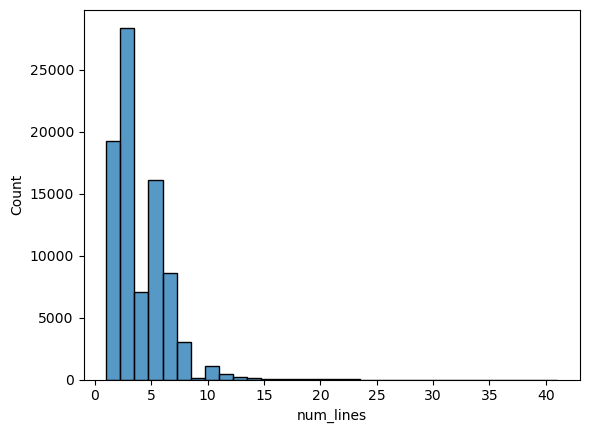

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(all_verse_lines['num_lines'], bins = 32)

The histogram above visualizes the distribution of the number of lines, showing that the vast majority of verses are fairly short, between 2 and 6 lines. 

In [15]:
ot_verse_lines = pd.read_csv('ot_verse_lines.csv')
nt_verse_lines = pd.read_csv('nt_verse_lines.csv')
bom_verse_lines = pd.read_csv('bom_verse_lines.csv')
dc_verse_lines = pd.read_csv('dc_verse_lines.csv')
pogp_verse_lines = pd.read_csv('pogp_verse_lines.csv')

In [16]:
print('OT ave line length:', ot_verse_lines['num_lines'].mean())
print('NT ave line length:', nt_verse_lines['num_lines'].mean())
print('BoM ave line length:', bom_verse_lines['num_lines'].mean())
print('D&C ave line length:', dc_verse_lines['num_lines'].mean())
print('PoGP ave line length:', pogp_verse_lines['num_lines'].mean())

OT ave line length: 4.436715391229579
NT ave line length: 3.9724770642201834
BoM ave line length: 6.574869109947644
D&C ave line length: 5.249664429530202
PoGP ave line length: 6.65527950310559


So the Pearl of Great Price has the longest average verse length, which isn't surprising, because it has Joseph Smith-History, which has some very, very long verses. The average line length for verses in that book is probably significantly higher than any other book. 

In [20]:
jsh_subset = all_verse_lines[all_verse_lines['foreign_key']=='js_h']

In [21]:
print('Joseph Smith-History ave line length:', jsh_subset['num_lines'].mean())

Joseph Smith-History ave line length: 10.793333333333333


Yep, just as I suspected, whereas we saw above that the average line-length of all the verses of scripture is 3.91, the average line length of the verses in the Joseph Smith-History is 10.79. In other words, the verses in the Joseph Smith-History are about 2.75 times as long as the average verse of scripture. 

In [28]:
print('OT longest lines:', ot_verse_lines['num_lines'].max())
print('OT longest verse:', ot_verse_lines[ot_verse_lines['num_lines'] == ot_verse_lines['num_lines'].max()]['pk'])
print('NT longest lines:', nt_verse_lines['num_lines'].max())
print('NT longest verse:', nt_verse_lines[nt_verse_lines['num_lines'] == nt_verse_lines['num_lines'].max()]['pk'])
print('BoM longest lines:', bom_verse_lines['num_lines'].max())
print('BoM longest verse:', bom_verse_lines[bom_verse_lines['num_lines'] == bom_verse_lines['num_lines'].max()]['pk'])
print('D&C longest lines:', dc_verse_lines['num_lines'].max())
print('D&C longest verse:', dc_verse_lines[dc_verse_lines['num_lines'] == dc_verse_lines['num_lines'].max()]['pk'])
print('PoGP longest lines:', pogp_verse_lines['num_lines'].max())
print('PoGP longest verse:', pogp_verse_lines[pogp_verse_lines['num_lines'] == pogp_verse_lines['num_lines'].max()]['pk'])

OT longest lines: 14
OT longest verse: 6614    esth_8_9
Name: pk, dtype: object
NT longest lines: 11
NT longest verse: 7274    rev_20_4
Name: pk, dtype: object
BoM longest lines: 41
BoM longest verse: 4220    bom_tof3_1
Name: pk, dtype: object
D&C longest lines: 31
D&C longest verse: 991     dc_128_18
1066    dc_132_19
Name: pk, dtype: object
PoGP longest lines: 33
PoGP longest verse: 176    js_h_28
Name: pk, dtype: object


The printout above displays the lengths and locations of the longest verses in each of the Standard Works. For example, the longest verse of the OT is found in Esther, chapter 8, verse 9, which is 14 lines long. (Going in and counting, it's actually 16 - because I set my function up to mathematically calculate the number of lines rather than actually counting them, this kind of error, especially in longer verses, is to be expected.) The longest verse of the Pearl of Great Price is JS-H verse 28, which is unsurprising: when you look at it in the printed scriptures, it is nearly an entire column long. Here it is listed as having 33 lines, in the scriptures it's actually 34. 